In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("Iris_flower_data_set.csv")
df.head()

,Sepal_Length_Cm,Sepal_Width_Cm,Petal_Length_Cm,Petal_Width_Cm,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [4]:
df.isnull().sum()

Sepal_Length_Cm    0
Sepal_Width_Cm     0
Petal_Length_Cm    0
Petal_Width_Cm     0
variety            0
dtype: int64

Text(0.5, 0.98, 'Histogram Analysis')

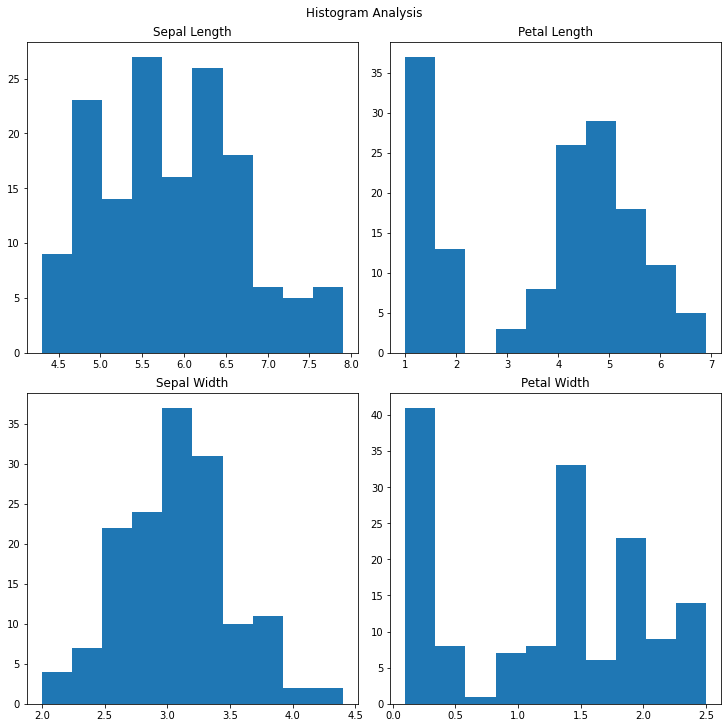

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), constrained_layout=True)
ax[0,0].hist(df['Sepal_Length_Cm'])
ax[0,0].set_title('Sepal Length')
ax[0,1].hist(df['Petal_Length_Cm'])
ax[0,1].set_title('Petal Length')
ax[1,0].hist(df['Sepal_Width_Cm'])
ax[1,0].set_title('Sepal Width')
ax[1,1].hist(df['Petal_Width_Cm'])
ax[1,1].set_title('Petal Width')
fig.suptitle('Histogram Analysis')

In [6]:
colors = ['red', 'green', 'blue']
species = ['Setosa', 'Versicolor', 'Virginica']
xlables = ['Sepal_Length_Cm', 'Petal_Length_Cm', 'Sepal_Length_Cm', 'Sepal_Width_Cm']
ylables = ['Sepal_Width_Cm', 'Petal_Width_Cm', 'Petal_Length_Cm', 'Petal_Width_Cm']

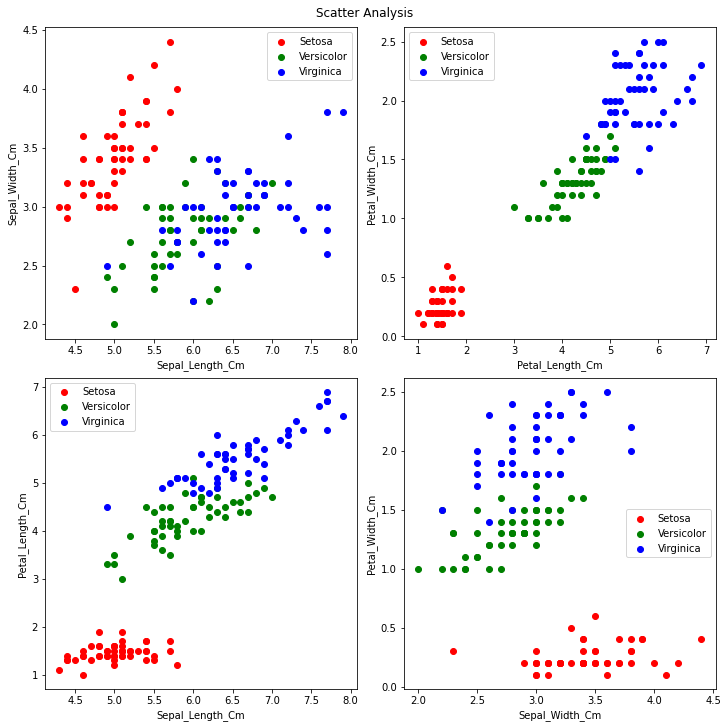

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10),constrained_layout=True)
plt.suptitle('Scatter Analysis')
for n in range(4):
    ax = plt.subplot(2, 2, n + 1)
    for i in range(3):
        x = df[df['variety'] == species[i]]
        ax.scatter(x[xlables[n]], x[ylables[n]], c = colors[i], label = species[i])
    ax.set_xlabel(xlables[n])
    ax.set_ylabel(ylables[n])
    ax.legend()

<AxesSubplot:>

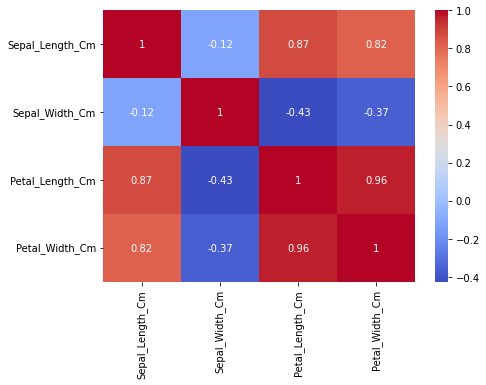

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (7, 5))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

In [9]:
le = LabelEncoder()
df['variety'] = le.fit_transform(df['variety'])

In [15]:
#training - 75%
#testing - 25% 
X = df.drop(columns = ['variety'])
Y = df['variety']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [16]:
# Logistic Regression algorithm 
model = LogisticRegression()
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.36842105263158


In [17]:
#k-Nearest Neighbor algorithms(kNN)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.36842105263158
